In [128]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

In [175]:
def random_flower_attraction(features=2, num_flowers = 10, max_attraction = 10):
    # Random initial condition, only positive, numbers between 0 and max_attraction
    return np.random.rand(features, num_flowers) * max_attraction


In [174]:
def random_flower_position(num_flowers = 10, max_position = 10):
    # Random initial condition, only positive, numbers between 0 and max_position
    return np.random.rand(2, num_flowers) * max_position

In [173]:
def random_bee_position(x_lim=10, y_lim=10):
    # Random initial condition x and y, only positive coordinates
    return np.array([np.random.rand() * x_lim, np.random.rand() * y_lim])

#test

In [172]:
def random_bee_attraction(features=2, max_attraction=10):
    # Random initial condition, only positive, numbers between 0 and max_attraction
    return np.random.rand(features) * max_attraction

In [178]:
flower_qnty = 10
max_attraction = 10
features = 2
flower_positions = random_flower_position(flower_qnty)
bee_position = random_bee_position()
bee_preferences = random_bee_attraction(features, max_attraction)
flower_attraction = random_flower_attraction(num_flowers=flower_qnty, features=features, max_attraction=max_attraction)

In [192]:
# print(flower_positions)
print(flower_positions[:,0] - bee_position)
# print(bee_position)
# print(bee_preferences)
# print(flower_attraction)

[ 0.56747071 -3.25863599]


In [181]:
flower_attraction - bee_preferences[:, np.newaxis]

array([[-5.69370717, -4.23533948, -3.4670706 , -7.86368098, -5.24132809,
        -2.12942534, -1.83654818, -2.62580482, -1.51260155, -8.0965217 ],
       [-2.81036881,  2.18439244,  2.68705651,  2.80677369,  2.46749325,
        -1.20942815, -0.23058298, -7.05992397,  0.37421582, -2.36148247]])

In [195]:
def attraction_to_velocity(mutual_attraction, mutual_distances, max_velocity=1):
    # normalize mutual_distances
    mutual_distances = mutual_distances / np.max(mutual_distances)
    return mutual_attraction * (1 - mutual_distances) * max_velocity

In [214]:
max_speed = .1
velocity = 0
mutual_attractions = flower_attraction - bee_preferences[:, np.newaxis]
distance = flower_positions - bee_position[:, np.newaxis]

G = attraction_to_velocity(mutual_attractions, distance)
print(G)
# velocity += max_speed/(1+np.exp(-G))
# buzz_factor = np.array([velocity[1],-velocity[0]])
    # return velocity + 5*np.sin(2*t)*(buzz_factor/(np.linalg.norm(buzz_factor)+1))

[[ -3.40054773  -7.34246592  -6.91061452  -6.39135195  -0.
   -8.53683996  -4.85805101  -0.94651633  -1.9282115  -30.35591307]
 [ -9.3100917   11.93386996   3.35617269   8.87523507  12.40776366
   -0.93100702  -0.21584149 -15.19189205   0.96345879 -12.25245657]]


In [217]:
def gauss_dist(distances, sigma=1):
    return np.exp(-np.linalg.norm(distances, axis=0)**2/(2*sigma**2))

In [219]:
def attraction_to_flower(mutual_attraction, mutual_distances, max_velocity=1):
    # normalize mutual_distances
    velocity_unit = mutual_distances / np.linalg.norm(mutual_distances, axis=0)
    return mutual_attraction * velocity_unit * gauss_dist(mutual_distances)
#test
attraction_to_flower(mutual_attractions, distance)

array([[-4.11211961e-03,  1.04101896e-09,  1.18779013e+00,
        -6.32788721e-03, -4.72354493e-08,  2.51826932e-04,
         1.24477684e-01, -2.27573063e-01,  2.05886571e-02,
         6.71030889e-11],
       [ 1.16553770e-02, -3.26648791e-09, -2.30799902e-01,
        -2.60814930e-02, -8.95828560e-08, -1.09426257e-05,
        -6.07308948e-04,  1.10202439e+00, -2.91901610e-02,
         2.98172984e-11]])

In [205]:
gauss_dist(distance)

array([4.20969218e-03, 1.51544174e-09, 3.53195157e-01, 9.32711667e-03,
       3.74070361e-08, 1.18606117e-04, 6.78292202e-02, 1.78541941e-01,
       7.91822204e-02, 1.51035779e-11])

In [196]:
def ode(t,x):
    max_speed = .1
    velocity = 0
    mutual_attractions = flower_attraction - bee_preferences[:, np.newaxis]
    distance = flower_positions - x[:, np.newaxis]

    G = attraction_to_velocity(mutual_attractions, distance)
    # velocity += max_speed/(1+np.exp(-G))
    buzz_factor = np.array([velocity[1],-velocity[0]])
    return velocity + 5*np.sin(2*t)*(buzz_factor/(np.linalg.norm(buzz_factor)+1))

sol = solve_ivp(ode,(0,300),bee_position,max_step=.1)

TypeError: 'int' object is not subscriptable

3002


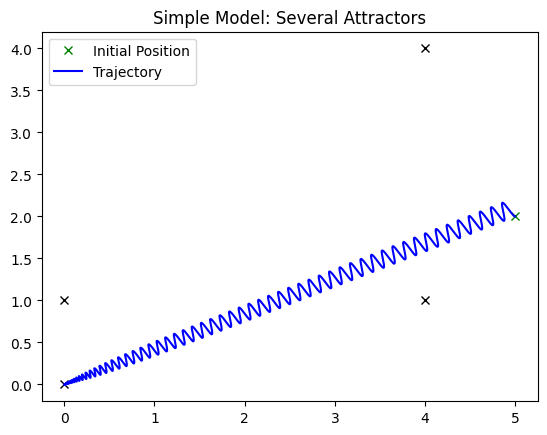

In [135]:
for attractor in attractors:
    plt.plot(attractor[0][0],attractor[0][1],'kx')
plt.plot(5,2,"gx",label="Initial Position")
print(len(sol.y[0]))
plt.plot(sol.y[0],sol.y[1],'b-',label="Trajectory")
plt.title("Simple Model: Several Attractors")
plt.legend(loc="best")
plt.savefig("several_attractors2.png",dpi=100)
